In [1]:
import matplotlib.pyplot as plt
import calibration
import matplotlib.image as mpimg
import imagefilter
import glob
import warp
import findlane
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from line import Line
import drawlane
%matplotlib inline

In [2]:
def draw(img, mtx, origin):
    leftfit, rightfit, leftx, rightx, lefty, righty = findlane.find_lane(img)
    ploty = findlane.get_ploty()
    return drawlane.lane_image(img, origin,mtx, ploty, leftfit,rightfit)

In [3]:
def process(img, cali_dict=None, warp_m=None, in_m=None):
    if cali_dict is None:
        cali_dict = calibration.cam_cali()
    cali_img = calibration.cali_img(img, cali_dict)
    if warp_m is None:
        warp_src, warp_dst = warp.warp_points()
        warp_m, in_m = warp.warp_ms(warp_src,warp_dst)
    warped_img = warp.warp_img(cali_img, warp_m)
    filtered_img = imagefilter.color_gradient_filter(warped_img)
    return filtered_img


In [4]:
images =[mpimg.imread(img) for img in glob.glob("test_images/test*.jpg")]

In [5]:
cali_dict = calibration.cam_cali()
cali_images = [calibration.cali_img(img, cali_dict) for img in images]

In [6]:
def plot_twin(images1, images2):
    for i in range(0, len(images1)):
        plt.figure()
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,9))
        ax1.imshow(images1[i])
        ax2.imshow(images2[i])

# plot_twin(images, cali_images)

In [7]:
filtered_images = [imagefilter.color_gradient_filter(img) for img in cali_images]
#plot_twin(cali_images, filtered_images)

In [8]:
src,dst = warp.warp_points()
m,in_m = warp.warp_ms(src, dst)

In [9]:
warped_images = [warp.warp_img(img,m) for img in cali_images]
filtered_warped_images = [imagefilter.color_gradient_filter(img) for img in warped_images]
# plot_twin(warped_images, filtered_warped_images)


In [10]:
final_images = [draw(filtered_warped_images[i],in_m, images[i]) for i in range(0, len(images))]
#plot_twin(filtered_warped_images, final_images)

In [11]:
processed_images = [process(img) for img in images]
#plot_twin(images, processed_images)

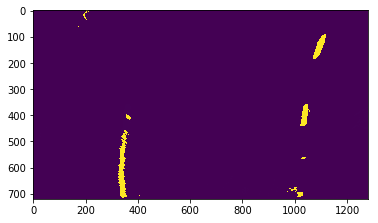

In [12]:


plt.imshow(processed_images[0])
line1 = Line()
line1.update(processed_images[0])

In [ ]:
drawlane.lane_image(, origin,mtx, ploty, leftfit,rightfit)

In [ ]:
white_output = 'output.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))